#Projet BioInfo 2024 :


Authors : Safidy, Jewin


##Importations and functions definitions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
from xml.etree.ElementTree import parse

##Step 1 : Data preprocessing

In [2]:
path = "Data" # the path of the data
print(path)

Data


Creating our dataframe containing all the genes/RNA of each samples.

In [3]:
pdList = [] # variable to temporary store all dataframes (one for each txt file)
# For all txt file
for fname in glob.glob(path+"/*.txt"):
    df = pd.read_table(fname) # put the file in a dataframe
    sample_name = re.search("GSM\d+", fname).group() # search the name of the sample in the file name
    df.rename(index= df["gene/TE"], inplace=True) # rename the index (=rows) using the column containing the gene name
    df.drop(columns=df.columns[0], axis=1, inplace=True) # drop the first column containing the gene name, no more need
    df.rename(columns={ df.columns[0]: sample_name }, inplace = True) # rename the column (there is only one column at this step) using the sample name
    pdList.append(df) # add the current dataframe in the list
data_matrix = pd.concat(pdList, axis=1) # concat all dataframe in 1 dataframe
data_matrix = data_matrix.transpose() # transpose the dataframe to get a more standard shape (samples x variables)

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/var/folders/tr/h_65n8h914l3t_14_m2z067r0000gn/T/ipykernel_52468/3309923370.py:5: SyntaxWarning: invalid escape sequence '\d'
  sample_name = re.search("GSM\d+", fname).group() # search the name of the sample in the file name


In [4]:
print(data_matrix.shape)
#print(len(data_matrix.index))
print(data_matrix)

(176, 28953)
            A1BG  A1BG-AS1  A1CF   A2M  A2M-AS1  A2ML1  A2MP1  A3GALT2  \
GSM3533382    42       189     0  4052       92    201      1        8   
GSM3533252    37       110     0  4660      102     64      7        1   
GSM3533337    31       110     0  1484       84     60      1        1   
GSM3533314    14        41     0  2185      105    198      4        0   
GSM3533391    37       118     0  1245      104    168      1        1   
...          ...       ...   ...   ...      ...    ...    ...      ...   
GSM3533291    29       142     0  1429      102    115      2        4   
GSM3533349    31       142     0  1526      108    122      2        1   
GSM3533339    39        95     0  1223       74     89      1        3   
GSM3533399    46       179     0  2899       89    109      1        6   
GSM3533403    64       290     0  4752      118    174      8        2   

            A4GALT  A4GNT  ...  X6B_LINE:CR1:LINE  X7A_LINE:CR1:LINE  \
GSM3533382      76      1 

The genes expressions are integer for each column gene.

Annotation dataframe

In [5]:
data_annotation = pd.DataFrame(columns = ['Sample_id', 'Source', 'Subject id', 'Sample_group']) # initialisation of the dataframe
xtree = parse('Data/GSE124439_family.xml') # create a variable containing the xml in a tree shape
xroot = xtree.getroot() # get the root of the tree to start the exploration of the tree/xml
# for each element named "sample" that can be found from the root
for child in xroot.iter("{http://www.ncbi.nlm.nih.gov/geo/info/MINiML}Sample"):
    temp_sample_id = child.attrib['iid'] # the attribut of this node contains the sample id ()
    # for each element named "Characteristics" that can be found from the current sample
    for child2 in child.iter("{http://www.ncbi.nlm.nih.gov/geo/info/MINiML}Characteristics"):
        if(child2.attrib["tag"] == "cns subregion"):
            temp_cns_subregion = child2.text.replace('\n', '')
        if(child2.attrib["tag"] == "subject id"):
            temp_subject_id = child2.text.replace('\n', '')
        if(child2.attrib["tag"] == "sample group"):
            temp_sample_group = child2.text.replace('\n', '')
    temp_df = pd.DataFrame({'Sample_id': [temp_sample_id], 'Source': [temp_cns_subregion],
                            'Subject id': [temp_subject_id], 'Sample_group' : [temp_sample_group]})
    data_annotation = pd.concat([data_annotation, temp_df])

In [6]:
print(data_annotation.shape)
#print(data_annotation.tail(20))
print(data_annotation.nunique(0))
print(data_annotation.keys())
print(data_annotation["Sample_group"].unique())
print(data_annotation["Source"].unique())

(176, 4)
Sample_id       176
Source            4
Subject id       95
Sample_group      3
dtype: int64
Index(['Sample_id', 'Source', 'Subject id', 'Sample_group'], dtype='object')
['ALS Spectrum MND      ' 'Non-Neurological Control      '
 'Other Neurological Disorders      ']
['Frontal Cortex      ' 'Motor Cortex (Medial)      '
 'Motor Cortex (Lateral)      ' 'Motor Cortex      ']


We can have differences of gene expressions depending on the source extracted.
We can use the Source by comparing each person and each source to check if there is a significant difference expression.
Be careful about the distribution of the Source and the group, we can use this only if these distribution are equal.
We can do a table.
Check if Source are the same or not.

The sample_group have 3 different types. The other neurological disease can be use to distinguish the ALS from the other neurological disease and the person without disease. Example a gene expression can be specific to neuro disease or specific to ALS.

Other type that could help us : age and gender.
Gender can be induced because the man will have gene from y chromoson that won't appear in women gene.

In [7]:
data_annotation

,Sample_id,Source,Subject id,Sample_group
0,GSM3533230,Frontal Cortex,NEUEL133AK6,ALS Spectrum MND
0,GSM3533231,Frontal Cortex,NEUYV496XLP,ALS Spectrum MND
0,GSM3533232,Frontal Cortex,NEUZU200WEQ,ALS Spectrum MND
0,GSM3533233,Frontal Cortex,NEUME287RK2,ALS Spectrum MND
0,GSM3533234,Frontal Cortex,NEUEC006FND,ALS Spectrum MND
...,...,...,...,...
0,GSM3533401,Frontal Cortex,NEUMY028JH4,ALS Spectrum MND
0,GSM3533402,Frontal Cortex,NEUXR145UBL,ALS Spectrum MND
0,GSM3533403,Frontal Cortex,NEUKN209FNW,ALS Spectrum MND
0,GSM3533404,Frontal Cortex,NEUUF289NRL,ALS Spectrum MND


Class definition :
We will use this class to stock our data make the computations and manipulation easier.

In [8]:
class ALS_RNAseq:
    def __init__(self, m, anno):
        self.__data_matrix = m
        self.__data_annotation = anno
        self.__data_merged = pd.merge(self.__data_annotation, self.__data_matrix, right_index=True, left_on="Sample_id").set_index('Sample_id')

#Setters to change data_matrix and data_annotation
    def set_data_matrix(self, m):
        self.__data_matrix = m

    def set_data_annotation(self, m):
        self.__data_annotation = m

#Getters to get the access to the field of the object
    def get_data_matrix(self):
        return self.__data_matrix

    def get_data_annotation(self):
        return self.__data_annotation

    def get_data_merged(self):
        return self.__data_merged

#Getters to get data_merged for each category of Sample_group or Source
    def get_data_merged_als(self):
        return self.__data_merged[self.__data_merged["Sample_group"]== self.__data_annotation["Sample_group"].unique()[0]]

    def get_data_merged_noneuro(self):
        return self.__data_merged[self.__data_merged["Sample_group"]== self.__data_annotation["Sample_group"].unique()[1]]

    def get_data_merged_other(self):
        return self.__data_merged[self.__data_merged["Sample_group"]== self.__data_annotation["Sample_group"].unique()[2]]

    def get_data_merged_frontalcortex(self):
        return self.__data_merged[self.__data_merged["Source"]== self.__data_annotation["Source"].unique()[0]]

    def get_data_merged_motorcortex_medial(self):
        return self.__data_merged[self.__data_merged["Source"]== self.__data_annotation["Source"].unique()[1]]

    def get_data_merged_motorcortex_lateral(self):
        return self.__data_merged[self.__data_merged["Source"]== self.__data_annotation["Source"].unique()[2]]

    def get_data_merged_motorcortex(self):
        return self.__data_merged[self.__data_merged["Source"]== self.__data_annotation["Source"].unique()[3]]

    def __str__(self):
        res = 10*"*****"
        res += "DataMatrix"
        res += 10*"*****"+"\n"
        res += self.__data_matrix.__str__()
        res += "\n"
        res += 10*"*****"
        res += "DataAnnotation"
        res += 10*"*****"+"\n"
        res += self.__data_annotation.__str__()
        return res

    #statistic per sample accross all genes
    def get_mean_per_sample(self):
        print("mean per sample accross all genes\n")
        return self.__data_merged.iloc[:,3:].mean(axis=1)

    def get_median_per_sample(self):
        print("median per sample accross all genes\n")
        return self.__data_merged.iloc[:,3:].median(axis=1)

    def get_standard_deviation_per_sample(self):
        print("standard deviation per sample accross all genes\n")
        return self.__data_merged.iloc[:,3:].std(axis=1)

    #statistic per genes accross all samples
    def get_mean_per_gene(self):
        print("mean per genes accross all samples\n")
        return self.__data_merged.iloc[:,3:].mean(axis=0)

    def get_median_per_gene(self):
        print("median per genes accross all samples\n")
        return self.__data_merged.iloc[:,3:].median(axis=0)

    def get_standard_deviation_per_gene(self):
        print("standard deviation per genes accross all samples\n")
        return self.__data_merged.iloc[:,3:].std(axis=0)

    def get_data_merged_summary(self):
        df_summary = pd.DataFrame(index = [0], columns=["nb_als", "nb_other", "nb_non_controlled",
                                   "nb_frontal_cortex", "nb_motor_cortex(medial)",
                                     "nb_motor_cortex(lateral)", "nb_motor_cortex"])
        df_summary.loc[0,"nb_als"] = self.get_data_merged_als().shape[0]
        df_summary.loc[0,"nb_other"] = self.get_data_merged_other().shape[0]
        df_summary.loc[0,"nb_non_controlled"] = self.get_data_merged_noneuro().shape[0]
        df_summary.loc[0, "nb_frontal_cortex"] = self.get_data_merged_frontalcortex().shape[0]
        df_summary.loc[0, "nb_motor_cortex(medial)"] = self.get_data_merged_motorcortex_medial().shape[0]
        df_summary.loc[0, "nb_motor_cortex(lateral)"] = self.get_data_merged_motorcortex_lateral().shape[0]
        df_summary.loc[0, "nb_motor_cortex"] = self.get_data_merged_motorcortex().shape[0]
        return df_summary

    def show_barCharts_diseaseGroup(self):
        # Create bar chart for distribution of samples across different disease groups
        plt.figure(figsize=(10, 6))
        self.__data_merged['Sample_group'].value_counts().plot(kind='bar', color='skyblue')
        plt.title('Distribution of Samples Across Disease Groups')
        plt.xlabel('Disease Groups')
        plt.ylabel('Number of Samples')
        plt.xticks(rotation=45)
        plt.tight_layout()
        # Show bar chart
        plt.show()

    def show_barCharts_Sources(self):
        # Create bar chart for distribution of samples across different sources
        plt.figure(figsize=(10, 6))
        self.__data_merged['Source'].value_counts().plot(kind='bar', color='lightgreen')
        plt.title('Distribution of Samples Across Sources')
        plt.xlabel('Sources')
        plt.ylabel('Number of Samples')
        plt.xticks(rotation=45)
        plt.tight_layout()
        # Show bar chart
        plt.show()

#Use histograms to represent the distribution of means,medians,and standard deviations calculated for each sample
    def show_histograms_means_medians_stds_per_sample(self):
        # Plot histograms for means, medians, and standard deviations
        plt.figure(figsize=(15, 5))
        # Histogram for means
        plt.subplot(1, 3, 1)
        plt.hist(self.__data_merged.iloc[:,3:].mean(axis=1), bins=20, color='skyblue')
        plt.title('Distribution of Means')
        plt.xlabel('Mean')
        plt.ylabel('Frequency')
        # Histogram for medians
        plt.subplot(1, 3, 2)
        plt.hist(self.__data_merged.iloc[:,3:].median(axis=1), bins=20, color='lightgreen')
        plt.title('Distribution of Medians')
        plt.xlabel('Median')
        plt.ylabel('Frequency')
        # Histogram for standard deviations
        plt.subplot(1, 3, 3)
        plt.hist(self.__data_merged.iloc[:,3:].std(axis=1), bins=20, color='salmon')
        plt.title('Distribution of Standard Deviations')
        plt.xlabel('Standard Deviation')
        plt.ylabel('Frequency')
        # Adjust layout
        plt.tight_layout()
        # Show histograms
        plt.show()

In [9]:
data = ALS_RNAseq(data_matrix, data_annotation)
data.get_data_merged()

,Source,Subject id,Sample_group,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
Sample_id,,,,,,,,,,,,,,,,,,,,,
GSM3533230,Frontal Cortex,NEUEL133AK6,ALS Spectrum MND,42,149,0,3327,101,78,4,...,986,2218,2096,1120,84,556,134,570,2045,2446
GSM3533231,Frontal Cortex,NEUYV496XLP,ALS Spectrum MND,25,107,2,1787,153,109,2,...,1216,2373,2001,1144,118,582,153,552,2057,2279
GSM3533232,Frontal Cortex,NEUZU200WEQ,ALS Spectrum MND,20,95,0,1830,121,127,1,...,905,2018,1815,1011,84,571,126,479,1659,1778
GSM3533233,Frontal Cortex,NEUME287RK2,ALS Spectrum MND,22,101,0,2131,142,143,5,...,935,2278,2032,1198,97,562,132,540,2032,2135
GSM3533234,Frontal Cortex,NEUEC006FND,ALS Spectrum MND,22,102,0,1706,83,178,1,...,966,2295,1993,1152,96,582,124,539,1742,1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533401,Frontal Cortex,NEUMY028JH4,ALS Spectrum MND,23,113,0,2130,72,71,2,...,553,1243,1089,658,72,320,73,311,1102,1169
GSM3533402,Frontal Cortex,NEUXR145UBL,ALS Spectrum MND,134,300,0,6077,171,42,8,...,719,1988,1691,966,119,460,109,399,1619,1724
GSM3533403,Frontal Cortex,NEUKN209FNW,ALS Spectrum MND,64,290,0,4752,118,174,8,...,623,1466,1246,726,61,358,107,347,1284,1469


We have fused the annotation dataframe and matrix because some samples miss the genes informations so we discard them.

In [40]:
print("Shape of data annotation: ",data.get_data_annotation().shape)
print("Shape of data matrix: ",data.get_data_matrix().shape)

Shape of data annotation:  (176, 4)
Shape of data matrix:  (176, 28953)


The number of samples in the annotations files and sampling are the same.

Some of these samples concern one person. Be careful about the unique quantity of these samples. Extreme example : a dataset of samples on one unique person.

##Step 2 : Descriptive analysis

The computation of metrics such as the mean helps to monitor our data and clean those that could be problematic. For example, if some individuals have excessively low levels of certain RNAs, it may be due to a technical bias/conservation, etc.
It is also important to examine the distribution of the data to prevent potential biases within a category.

###Sample description

####Distribution

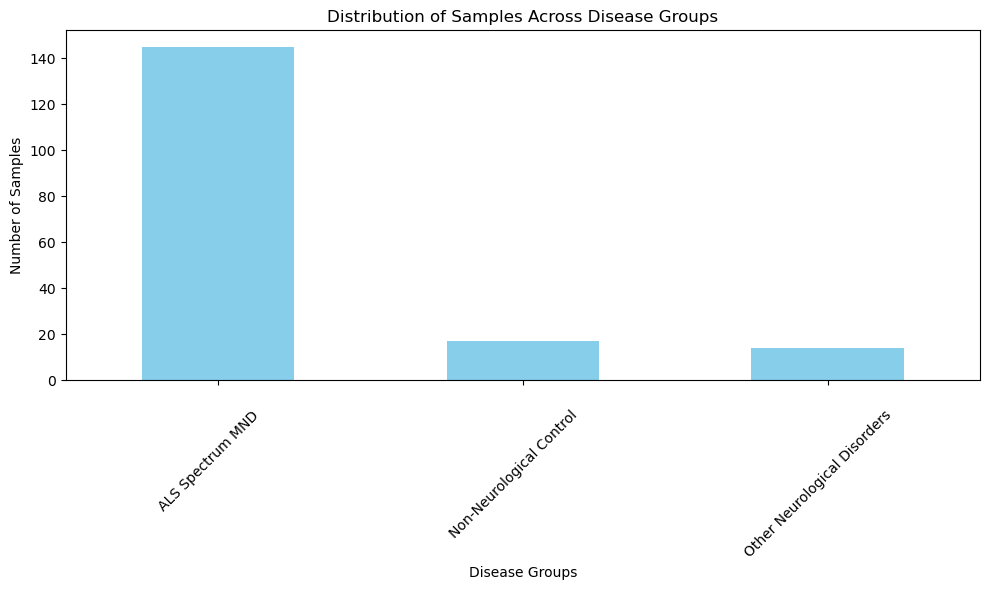

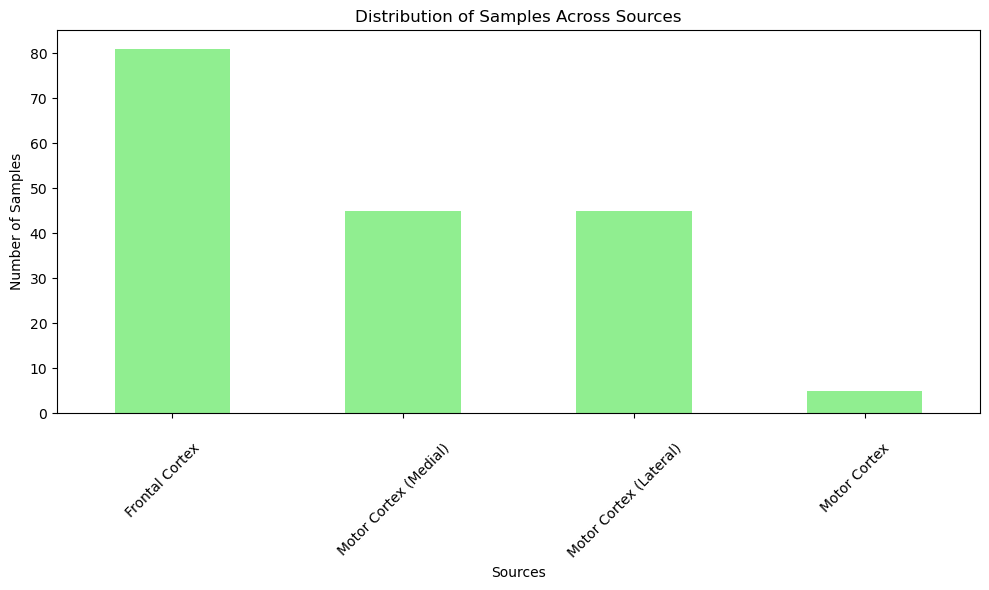

In [41]:
data.show_barCharts_diseaseGroup()
data.show_barCharts_Sources()

We also observe that the number of samples taken from the motor cortex is a minority according to the annotations. The distribution is unequal both in terms of sick/non-sick individuals, and also in terms of the regions of the skull sampled.

####Metrics and histograms

Calculons les métriques pour tous les échantillons :

In [42]:
metric_samples = data.get_mean_per_sample().to_frame(name="mean").join(
                 data.get_median_per_sample().to_frame(name="median").join(
                 data.get_standard_deviation_per_sample().to_frame(name="std")))
metric_samples

mean per sample accross all genes

median per sample accross all genes

standard deviation per sample accross all genes



,mean,median,std
Sample_id,,,
GSM3533230,1041.382378,92.0,7144.948717
GSM3533231,881.608503,65.0,6556.784539
GSM3533232,802.592132,58.0,5618.694081
GSM3533233,785.868615,65.0,6617.736421
GSM3533234,906.813525,61.0,6815.130467
...,...,...,...
GSM3533401,621.179187,51.0,3875.932581
GSM3533402,1412.596518,136.0,7679.231478
GSM3533403,1142.241288,101.0,5264.705168


On voit qu'il a de grosses valeurs en moyennes et écart-type comparé à la médiane.
Essayons de les observers graphiquement.

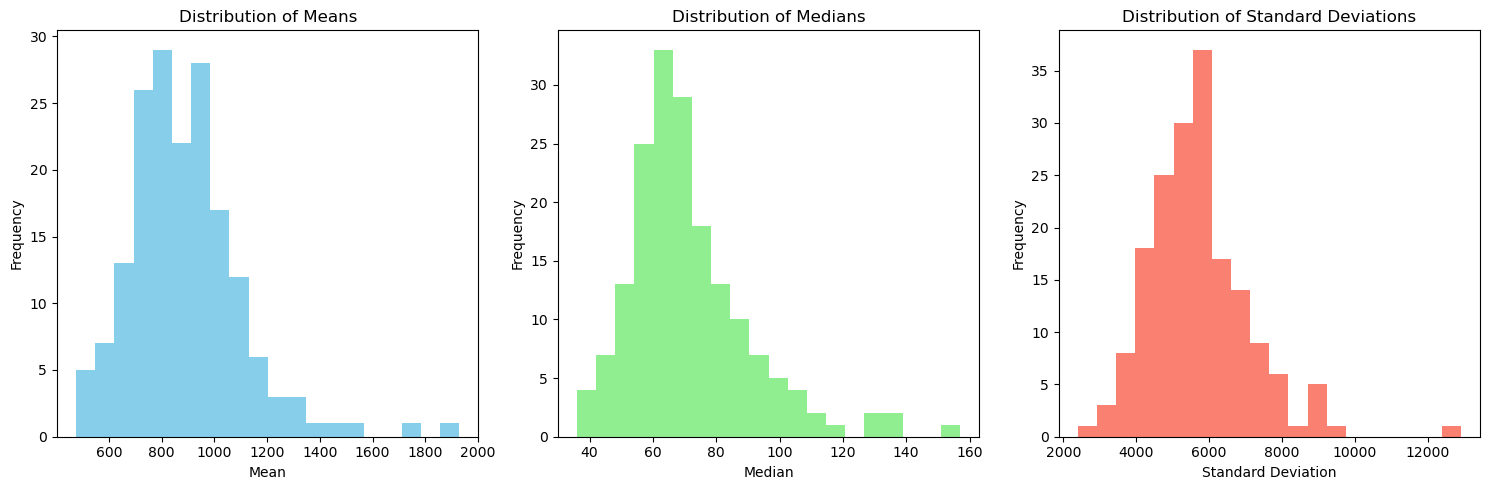

In [43]:
data.show_histograms_means_medians_stds_per_sample()

On peut voir sur ces histogrammes que la distribution de l'expressivité des gènes en terme de moyenne, mediannes et écart-type suit à peu près une loi normale. On peut potentiellement virer les valeurs extrêmes à droite.

####Another approach with subgroups metrics (incomplete)

Essayons une autre approche qui regroupe qu'une partie des données. On peut essayer de distinguer les non malades des malades par exemple.

In [44]:
print(data.get_data_annotation()["Sample_group"].unique())
print(data.get_data_annotation()["Source"].unique())

['ALS Spectrum MND      ' 'Non-Neurological Control      '
 'Other Neurological Disorders      ']
['Frontal Cortex      ' 'Motor Cortex (Medial)      '
 'Motor Cortex (Lateral)      ' 'Motor Cortex      ']


Au total, on a 3 groupes de malades et les échantillons ont été récupérés de 4 endroits différents du crâne.

In [45]:
print(data.get_data_merged_als().shape)
print(data.get_data_merged_noneuro().shape)
print(data.get_data_merged_other().shape)

(145, 28956)
(17, 28956)
(14, 28956)


Essayons d'avoir tout de mêmes des statistiques descriptives sur chacune de ces catégories, peut-être qu'on peut distinguer les malades des non malades par la moyenne des gènes par exemple.

In [46]:
#Calcul des métriques pour les malades ALS
ALS_df = data.get_data_merged_als()
ALS_df["mean"] = ALS_df.mean(axis=1, numeric_only=True)
ALS_df["median"] = ALS_df.median(axis=1, numeric_only=True)
ALS_df["std"] = ALS_df.std(axis=1, numeric_only=True)

#Calcul des métriques pour les non-controlés
NonNeuro_df = data.get_data_merged_noneuro()
NonNeuro_df["mean"] = NonNeuro_df.mean(axis=1, numeric_only=True)
NonNeuro_df["median"] = NonNeuro_df.median(axis=1, numeric_only=True)
NonNeuro_df["std"] = NonNeuro_df.std(axis=1, numeric_only=True)

#Calcul des métriques pour les autres maladies neurologiques
OtherNeuro_df = data.get_data_merged_other()
OtherNeuro_df["mean"] = OtherNeuro_df.mean(axis=1, numeric_only=True)
OtherNeuro_df["median"] = OtherNeuro_df.median(axis=1, numeric_only=True)
OtherNeuro_df["std"] = OtherNeuro_df.std(axis=1, numeric_only=True)

/var/folders/tr/h_65n8h914l3t_14_m2z067r0000gn/T/ipykernel_1891/3732526358.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ALS_df["mean"] = ALS_df.mean(axis=1, numeric_only=True)
/var/folders/tr/h_65n8h914l3t_14_m2z067r0000gn/T/ipykernel_1891/3732526358.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ALS_df["median"] = ALS_df.median(axis=1, numeric_only=True)
/var/folders/tr/h_65n8h914l3t_14_m2z067r0000gn/T/ipykernel_1891/3732526358.py:5: SettingWithCopyWarning: 
A value is trying to be set on a cop

Affichons ces métriques sous la formes de graphes.

array([[<Axes: title={'center': 'mean'}>,
        <Axes: title={'center': 'median'}>],
       [<Axes: title={'center': 'std'}>, <Axes: >]], dtype=object)

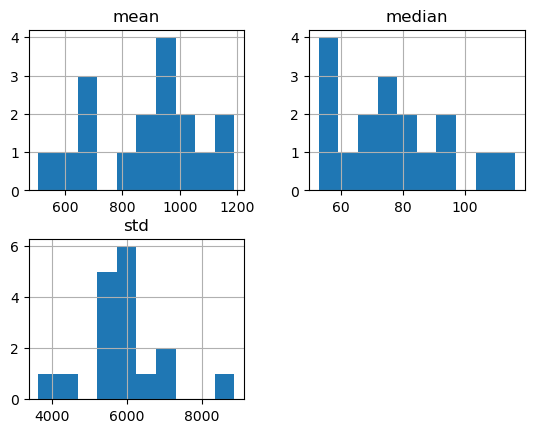

In [47]:
columns_to_plot = ["mean", "median", "std"]
NonNeuro_df[columns_to_plot].hist()

array([[<Axes: title={'center': 'mean'}>,
        <Axes: title={'center': 'median'}>],
       [<Axes: title={'center': 'std'}>, <Axes: >]], dtype=object)

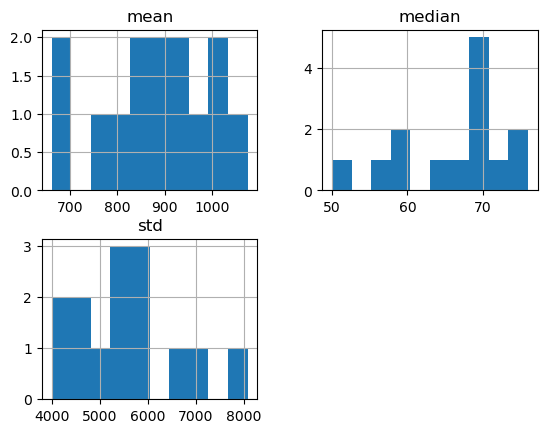

In [48]:
OtherNeuro_df[columns_to_plot].hist()

array([[<Axes: title={'center': 'mean'}>,
        <Axes: title={'center': 'median'}>],
       [<Axes: title={'center': 'std'}>, <Axes: >]], dtype=object)

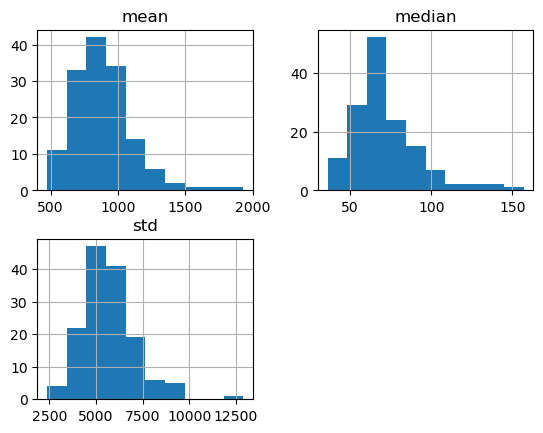

In [49]:
ALS_df[columns_to_plot].hist()

Il est assez difficile de tirer quelque chose des ses histogrammes en raison du peu de données qu'on a pour les deux autres catégories néanmoins on peut remarquer que la médiane de l'ensemble des gènes d'un échantillon est plus élevée chez les patients non malades que malades.

####Summary tables

Faisons un résumé sous forme d'une table des informations obtenues durant cette analyse.

In [50]:
data.get_data_merged_summary()

,nb_als,nb_other,nb_non_controlled,nb_frontal_cortex,nb_motor_cortex(medial),nb_motor_cortex(lateral),nb_motor_cortex
0,145,14,17,81,45,45,5


In [51]:
summary = pd.DataFrame([[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]])
index = data.get_data_merged()['Sample_group'].unique()
summary = summary.set_index(np.append(index, 'Total'))
summary.columns = np.append(data.get_data_merged()['Source'].unique(), 'Total')
#summary.iloc[0,0] = 

Ce tableau représente les différents nombre d'échantillons qu'on a pour chaque catégorie de colonne donnée.

In [52]:
metric_samples

,mean,median,std
Sample_id,,,
GSM3533230,1041.382378,92.0,7144.948717
GSM3533231,881.608503,65.0,6556.784539
GSM3533232,802.592132,58.0,5618.694081
GSM3533233,785.868615,65.0,6617.736421
GSM3533234,906.813525,61.0,6815.130467
...,...,...,...
GSM3533401,621.179187,51.0,3875.932581
GSM3533402,1412.596518,136.0,7679.231478
GSM3533403,1142.241288,101.0,5264.705168


Ce dataframe résume les 3 métriques qu'on a calculé pour chaque échantillons.

####Box plots

In [53]:
tmp = pd.merge(data.get_data_annotation(), metric_samples, left_on="Sample_id", right_index=True)
tmp["mean"] = tmp["mean"].astype(int)
tmp["median"] = tmp["median"].astype(int)
tmp["std"] = tmp["std"].astype(int)
tmp

,Sample_id,Source,Subject id,Sample_group,mean,median,std
0,GSM3533230,Frontal Cortex,NEUEL133AK6,ALS Spectrum MND,1041,92,7144
0,GSM3533231,Frontal Cortex,NEUYV496XLP,ALS Spectrum MND,881,65,6556
0,GSM3533232,Frontal Cortex,NEUZU200WEQ,ALS Spectrum MND,802,58,5618
0,GSM3533233,Frontal Cortex,NEUME287RK2,ALS Spectrum MND,785,65,6617
0,GSM3533234,Frontal Cortex,NEUEC006FND,ALS Spectrum MND,906,61,6815
...,...,...,...,...,...,...,...
0,GSM3533401,Frontal Cortex,NEUMY028JH4,ALS Spectrum MND,621,51,3875
0,GSM3533402,Frontal Cortex,NEUXR145UBL,ALS Spectrum MND,1412,136,7679
0,GSM3533403,Frontal Cortex,NEUKN209FNW,ALS Spectrum MND,1142,101,5264
0,GSM3533404,Frontal Cortex,NEUUF289NRL,ALS Spectrum MND,1435,132,7032


Text(0.5, 1.0, 'Boxplot for the std of each sample')

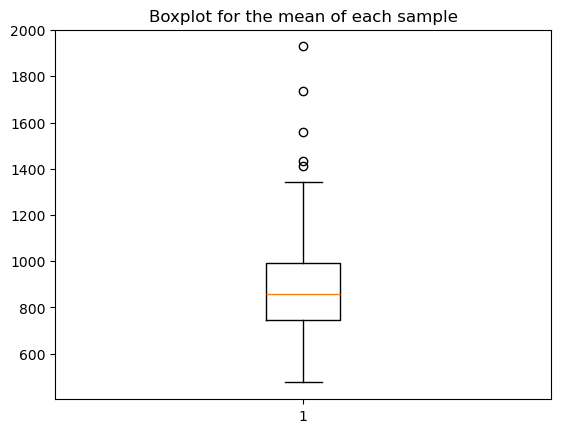

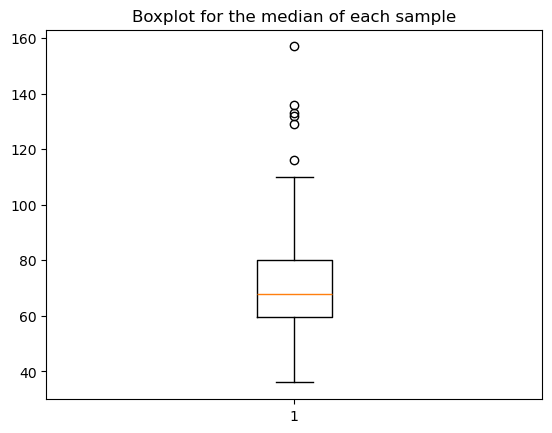

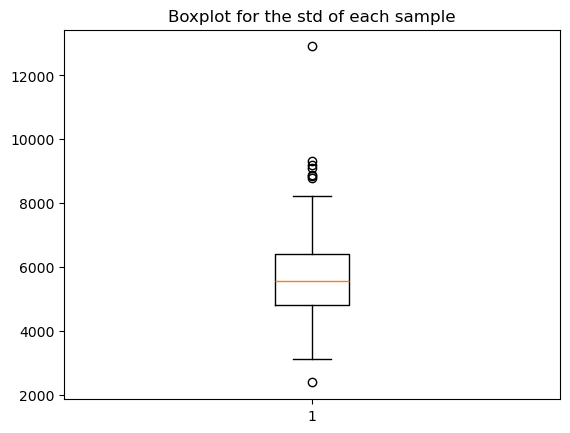

In [54]:
fig, axs = plt.subplots()
axs.boxplot(tmp["mean"])
axs.set_title('Boxplot for the mean of each sample')
fig, boxplot_median = plt.subplots()
boxplot_median.boxplot(tmp["median"])
boxplot_median.set_title('Boxplot for the median of each sample')
fig, axs = plt.subplots()
axs.boxplot(tmp["std"])
axs.set_title('Boxplot for the std of each sample')

Les boxplots pour les échantillons en général montrent qu'il y a une distribution des données à peu près équilibré de moyennes, median et écart-type. On distingue qu'il y a qand même des valeurs aberrantes.

Essayons de regarder les boxplots pour chaque groupes et chaque sources.

In [55]:
Source = data.get_data_merged()["Source"].unique()

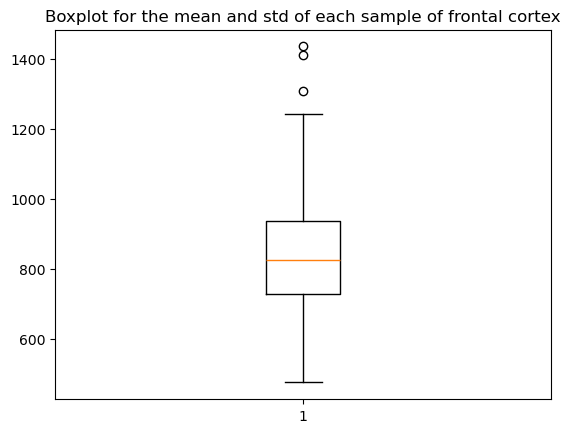

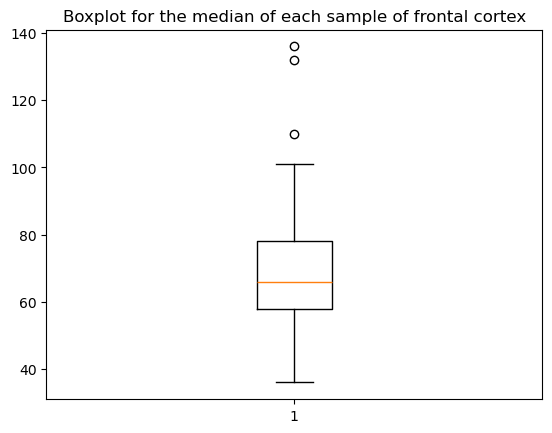

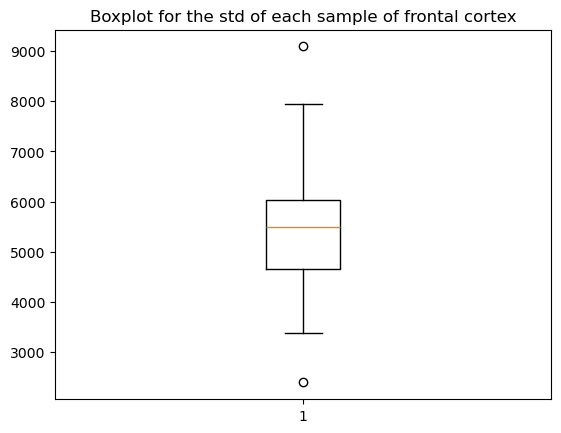

In [56]:
data_src_0 = tmp[tmp["Source"] == Source[0]]
fig, axs = plt.subplots()
axs.boxplot(data_src_0[["mean"]])
axs.set_title('Boxplot for the mean and std of each sample of frontal cortex')
fig, axs2 = plt.subplots()
axs2.boxplot(data_src_0[["median"]])
axs2.set_title('Boxplot for the median of each sample of frontal cortex')
fig, axs3 = plt.subplots()
axs3.boxplot(data_src_0[["std"]])
axs3.set_title('Boxplot for the std of each sample of frontal cortex')
plt.show()

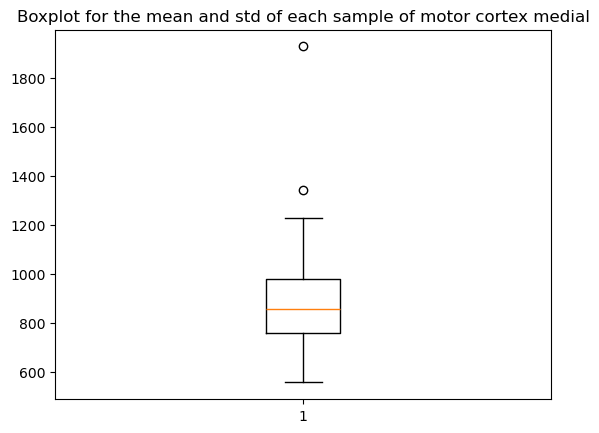

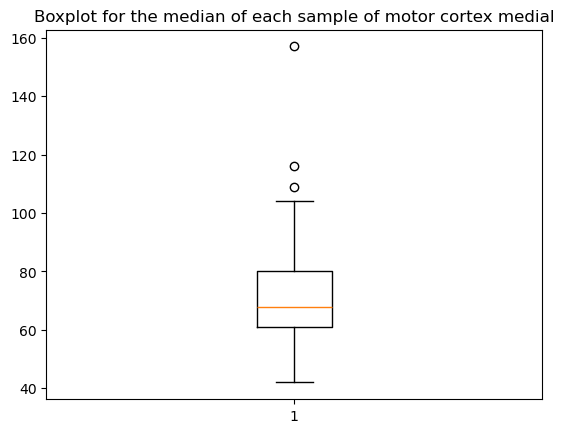

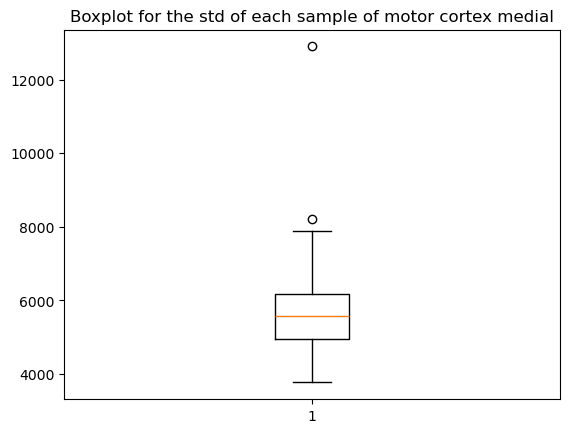

In [57]:
data_src_1 = tmp[tmp["Source"] == Source[1]]
fig, axs = plt.subplots()
axs.boxplot(data_src_1[["mean"]])
axs.set_title('Boxplot for the mean and std of each sample of motor cortex medial')
fig, axs2 = plt.subplots()
axs2.boxplot(data_src_1[["median"]])
axs2.set_title('Boxplot for the median of each sample of motor cortex medial')
fig, axs3 = plt.subplots()
axs3.boxplot(data_src_1[["std"]])
axs3.set_title('Boxplot for the std of each sample of motor cortex medial')
plt.show()


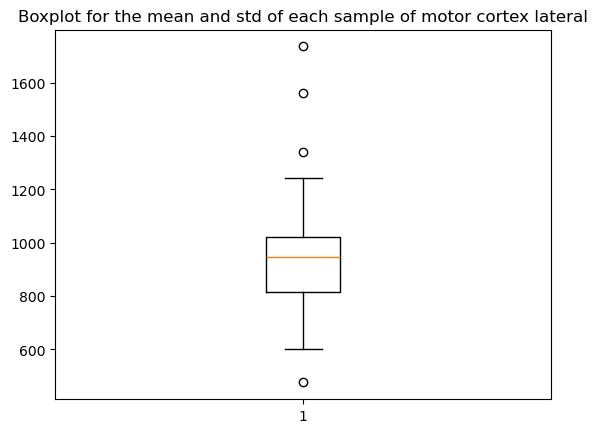

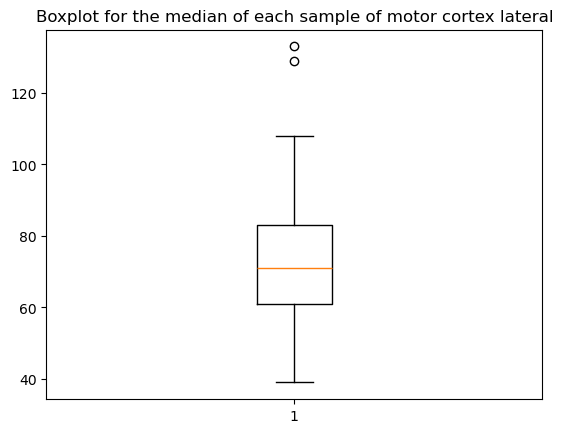

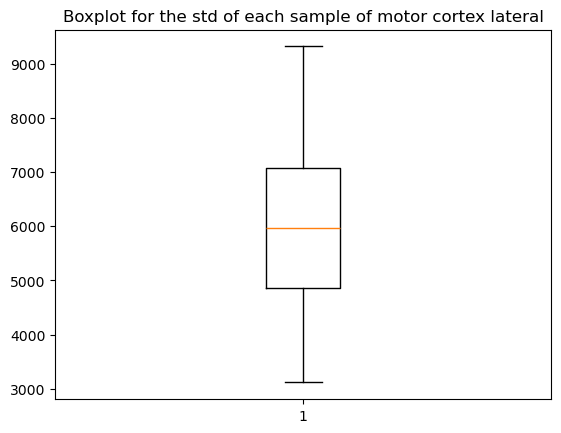

In [58]:
data_src_2 = tmp[tmp["Source"] == Source[2]]
fig, axs = plt.subplots()
axs.boxplot(data_src_2[["mean"]])
axs.set_title('Boxplot for the mean and std of each sample of motor cortex lateral')
fig, axs2 = plt.subplots()
axs2.boxplot(data_src_2[["median"]])
axs2.set_title('Boxplot for the median of each sample of motor cortex lateral')
fig, axs3 = plt.subplots()
axs3.boxplot(data_src_2[["std"]])
axs3.set_title('Boxplot for the std of each sample of motor cortex lateral')
plt.show()


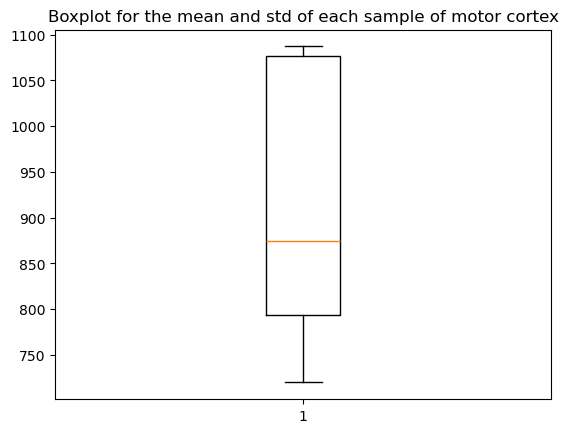

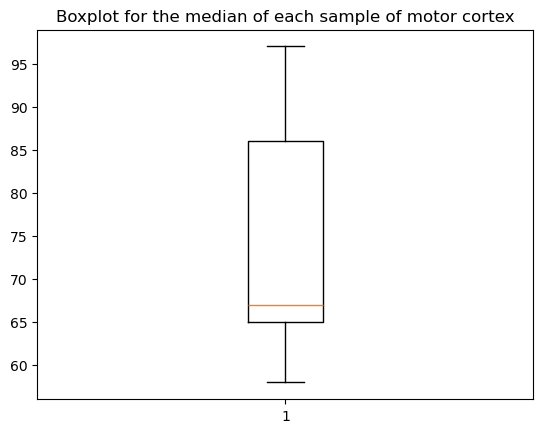

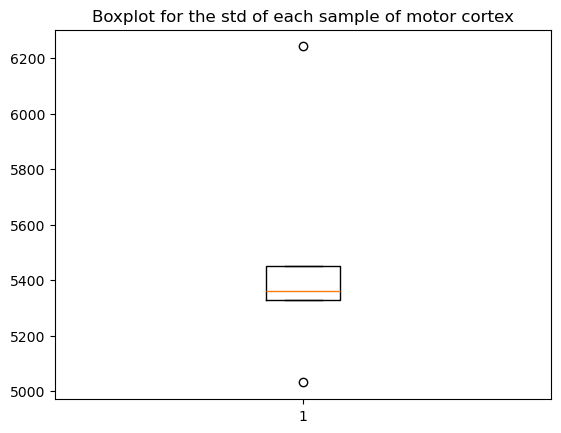

In [59]:
data_src_3 = tmp[tmp["Source"] == Source[3]]
fig, axs = plt.subplots()
axs.boxplot(data_src_3[["mean"]])
axs.set_title('Boxplot for the mean and std of each sample of motor cortex')
fig, axs2 = plt.subplots()
axs2.boxplot(data_src_3[["median"]])
axs2.set_title('Boxplot for the median of each sample of motor cortex')
fig, axs3 = plt.subplots()
axs3.boxplot(data_src_3[["std"]])
axs3.set_title('Boxplot for the std of each sample of motor cortex')
plt.show()

Il a y a plus de déséquillibre et de valeurs aberrantes.

In [60]:
Group = tmp["Sample_group"].unique()
Group

array(['ALS Spectrum MND      ', 'Non-Neurological Control      ',
       'Other Neurological Disorders      '], dtype=object)

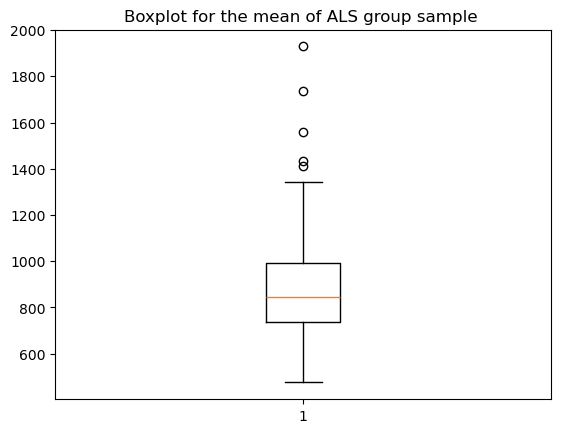

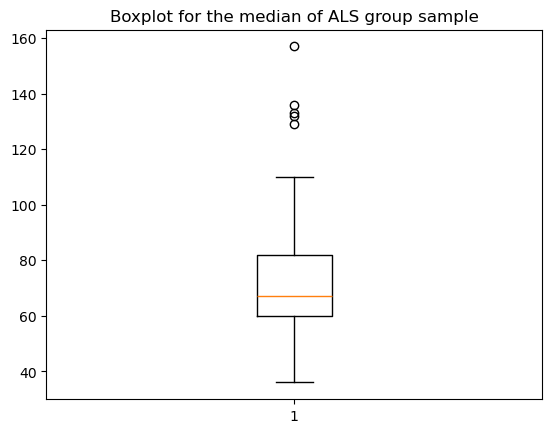

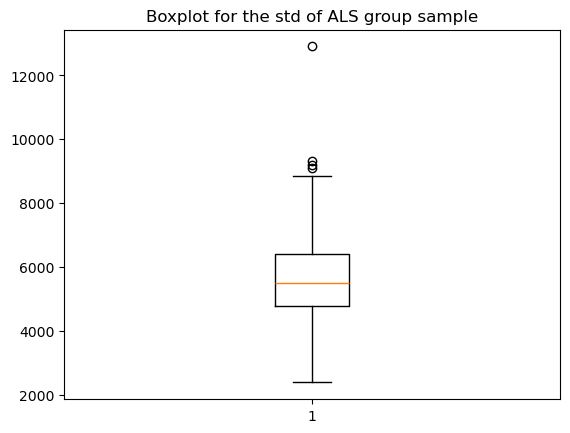

In [61]:
data_group0 = tmp[tmp["Sample_group"]==Group[0]]
fig, axs = plt.subplots()
axs.boxplot(data_group0[["mean"]])
axs.set_title('Boxplot for the mean of ALS group sample ')
fig, axs2 = plt.subplots()
axs2.boxplot(data_group0[["median"]])
axs2.set_title('Boxplot for the median of ALS group sample')
fig, axs3 = plt.subplots()
axs3.boxplot(data_group0[["std"]])
axs3.set_title('Boxplot for the std of ALS group sample')
plt.show()

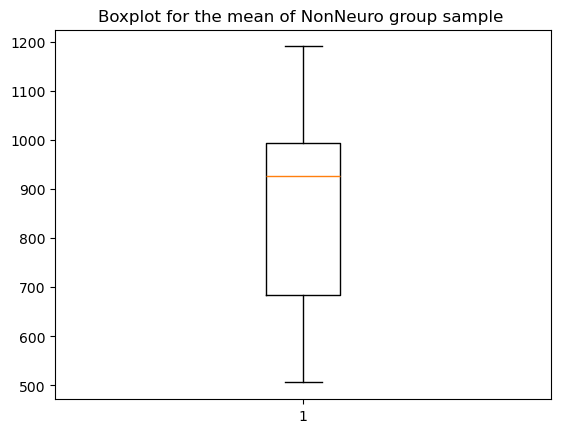

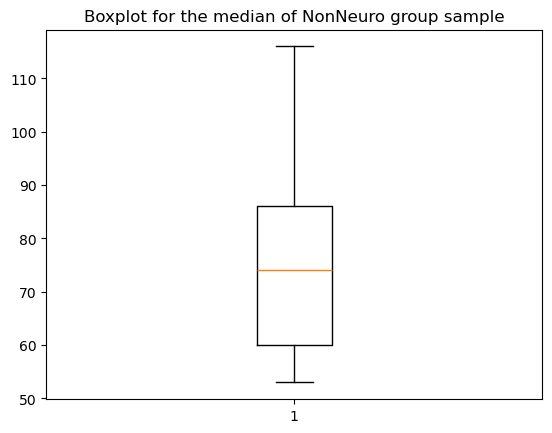

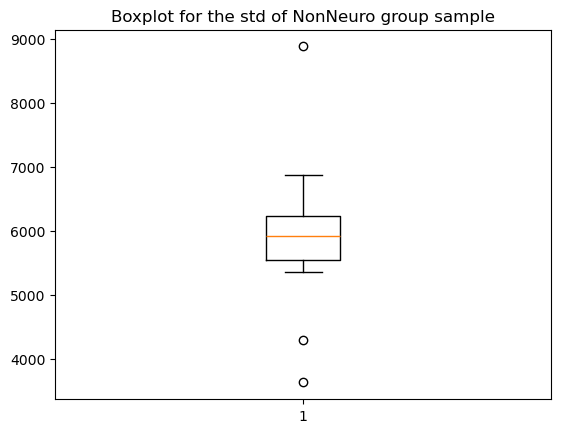

In [62]:
data_group0 = tmp[tmp["Sample_group"]==Group[1]]
fig, axs = plt.subplots()
axs.boxplot(data_group0[["mean"]])
axs.set_title('Boxplot for the mean of NonNeuro group sample ')
fig, axs2 = plt.subplots()
axs2.boxplot(data_group0[["median"]])
axs2.set_title('Boxplot for the median of NonNeuro group sample')
fig, axs3 = plt.subplots()
axs3.boxplot(data_group0[["std"]])
axs3.set_title('Boxplot for the std of NonNeuro group sample')
plt.show()

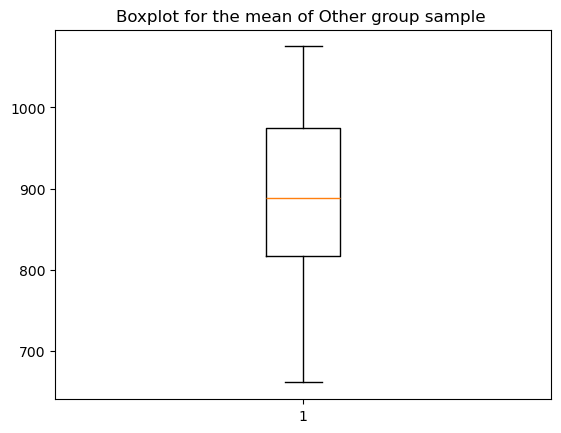

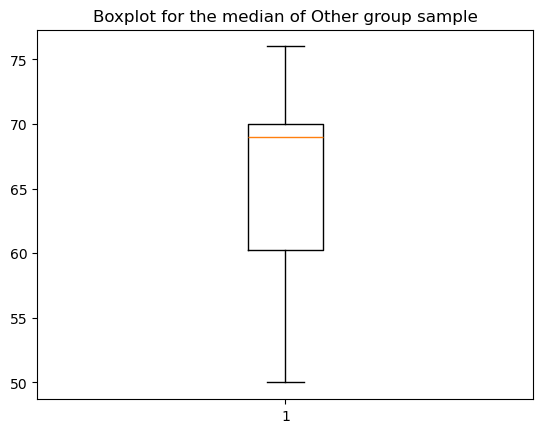

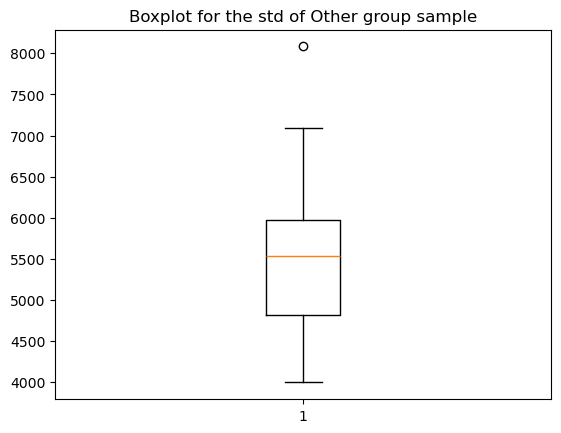

In [63]:
data_group0 = tmp[tmp["Sample_group"]==Group[2]]
fig, axs = plt.subplots()
axs.boxplot(data_group0[["mean"]])
axs.set_title('Boxplot for the mean of Other group sample ')
fig, axs2 = plt.subplots()
axs2.boxplot(data_group0[["median"]])
axs2.set_title('Boxplot for the median of Other group sample')
fig, axs3 = plt.subplots()
axs3.boxplot(data_group0[["std"]])
axs3.set_title('Boxplot for the std of Other group sample')
plt.show()

Il faudrait vérifier s'il ne faut pas calculer la moyenne, median, std uniquement sur les valeurs du groupes et pas en général.

In [64]:
heatmap = tmp.set_index(tmp["Sample_id"]).drop("Sample_id",axis=1)
heatmap

,Source,Subject id,Sample_group,mean,median,std
Sample_id,,,,,,
GSM3533230,Frontal Cortex,NEUEL133AK6,ALS Spectrum MND,1041,92,7144
GSM3533231,Frontal Cortex,NEUYV496XLP,ALS Spectrum MND,881,65,6556
GSM3533232,Frontal Cortex,NEUZU200WEQ,ALS Spectrum MND,802,58,5618
GSM3533233,Frontal Cortex,NEUME287RK2,ALS Spectrum MND,785,65,6617
GSM3533234,Frontal Cortex,NEUEC006FND,ALS Spectrum MND,906,61,6815
...,...,...,...,...,...,...
GSM3533401,Frontal Cortex,NEUMY028JH4,ALS Spectrum MND,621,51,3875
GSM3533402,Frontal Cortex,NEUXR145UBL,ALS Spectrum MND,1412,136,7679
GSM3533403,Frontal Cortex,NEUKN209FNW,ALS Spectrum MND,1142,101,5264


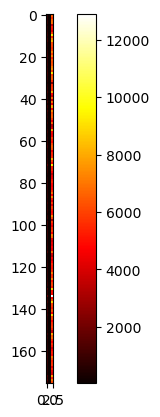

In [65]:
plt.imshow(heatmap[["mean", "median", "std"]], cmap='hot', interpolation='nearest')
plt.colorbar()
#plt.imshow()

###RNA counts description :

Calculons les métriques pour tous les gènes :

In [66]:
metrics_gene = data.get_mean_per_gene().to_frame(name="mean").join(
               data.get_median_per_gene().to_frame(name="median").join(
               data.get_standard_deviation_per_gene().to_frame(name="std")
                 )
               )
metrics_gene

mean per genes accross all samples

median per genes accross all samples

standard deviation per genes accross all samples



,mean,median,std
A1BG,38.062500,34.0,20.511225
A1BG-AS1,118.568182,108.5,48.137849
A1CF,0.170455,0.0,0.662835
A2M,2455.403409,2286.5,1278.351971
A2M-AS1,102.568182,94.5,35.553998
...,...,...,...
X8_LINE:CR1:LINE,462.647727,448.0,129.147228
X9_LINE:L1:LINE,110.863636,107.0,33.597511
Zaphod2:hAT-Tip100:DNA,415.931818,409.5,122.379157
Zaphod3:hAT-Tip100:DNA,1555.630682,1562.5,462.496696


array([[<Axes: title={'center': 'mean'}>,
        <Axes: title={'center': 'median'}>],
       [<Axes: title={'center': 'std'}>, <Axes: >]], dtype=object)

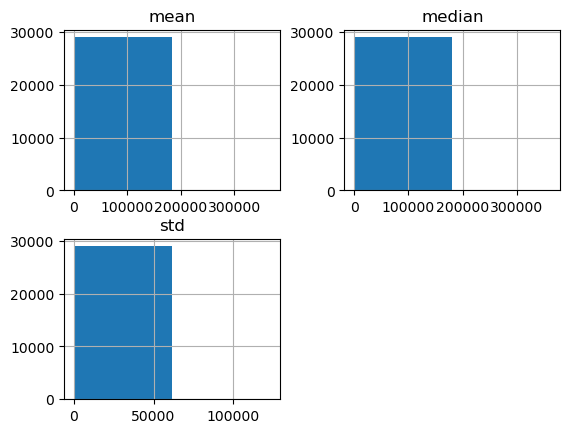

In [67]:
metrics_gene.hist(bins=2)

<Axes: >

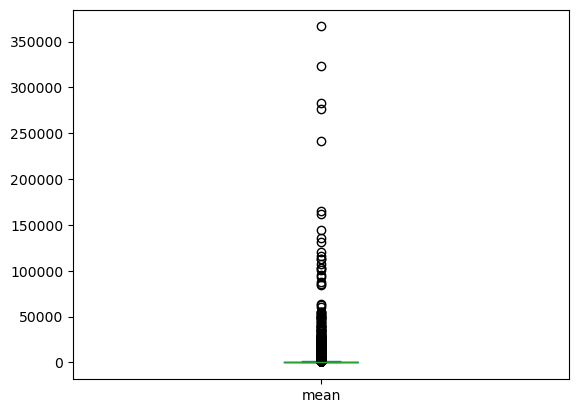

In [68]:
metrics_gene['mean'].plot.box()

In [69]:
logdf = np.log1p(metrics_gene)
logdf

,mean,median,std
A1BG,3.665163,3.555348,3.068575
A1BG-AS1,4.783887,4.695925,3.894630
A1CF,0.157392,0.000000,0.508524
A2M,7.806454,7.735215,7.154109
A2M-AS1,4.640230,4.559126,3.598791
...,...,...,...
X8_LINE:CR1:LINE,6.139125,6.107023,4.868666
X9_LINE:L1:LINE,4.717281,4.682131,3.543782
Zaphod2:hAT-Tip100:DNA,6.032923,6.017376,4.815262
Zaphod3:hAT-Tip100:DNA,7.350279,7.354682,6.138799


array([[<Axes: title={'center': 'mean'}>,
        <Axes: title={'center': 'median'}>],
       [<Axes: title={'center': 'std'}>, <Axes: >]], dtype=object)

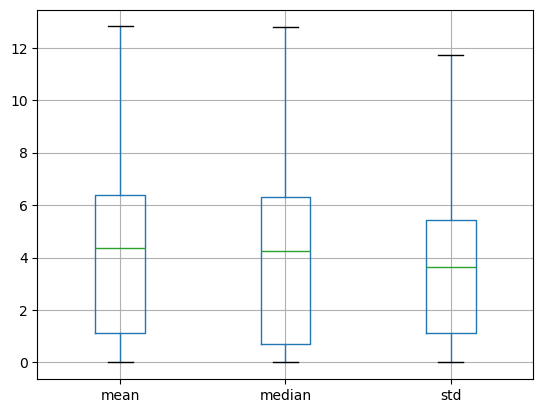

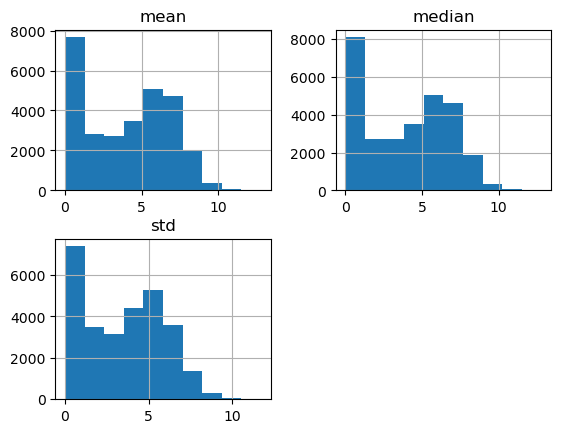

In [70]:
logdf.boxplot()
logdf.hist()

En normalisant avec une fonction logarithmique, on peut déjà mieux interpréter les données. Il y a une grande majorité de donnée ayant des métriques proches de 0. Sinon cela suis une loi normale si on ignore le pic au début.


In [71]:
metrics_gene_ALS = data.get_data_merged_als().iloc[:,3:].mean(axis=0).to_frame(name="mean").join(
               data.get_data_merged_als().iloc[:,3:].median(axis=0).to_frame(name="median").join(
               data.get_data_merged_als().iloc[:,3:].std(axis=0).to_frame(name="std")
                 )
               )
metrics_gene_ALS

,mean,median,std
A1BG,37.710345,33.0,20.312803
A1BG-AS1,119.379310,109.0,51.383778
A1CF,0.200000,0.0,0.722649
A2M,2486.924138,2222.0,1338.114568
A2M-AS1,103.503448,95.0,35.813972
...,...,...,...
X8_LINE:CR1:LINE,460.924138,446.0,131.111174
X9_LINE:L1:LINE,111.420690,107.0,33.177483
Zaphod2:hAT-Tip100:DNA,417.931034,415.0,127.511909
Zaphod3:hAT-Tip100:DNA,1553.972414,1540.0,476.597270


array([[<Axes: title={'center': 'mean'}>,
        <Axes: title={'center': 'median'}>],
       [<Axes: title={'center': 'std'}>, <Axes: >]], dtype=object)

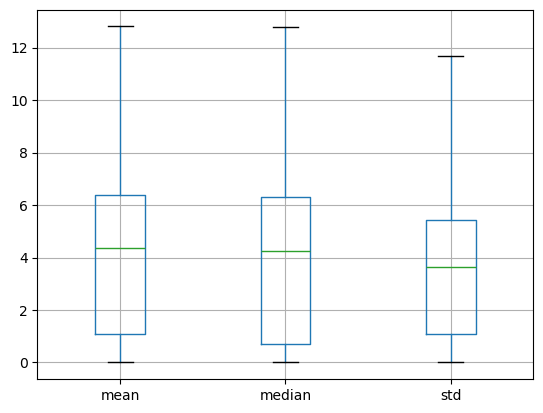

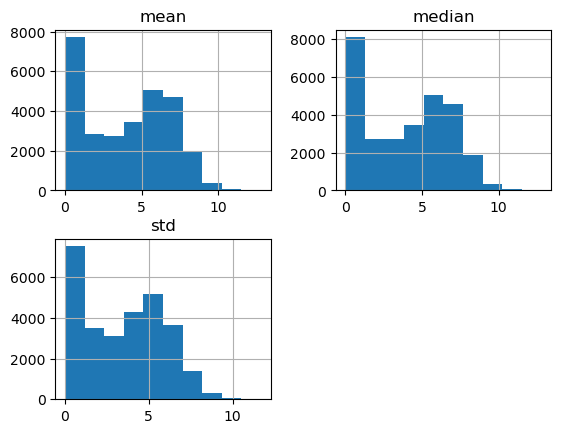

In [72]:
log_metrics_gene_als = np.log1p(metrics_gene_ALS)
log_metrics_gene_als.boxplot()
log_metrics_gene_als.hist()

array([[<Axes: title={'center': 'mean'}>,
        <Axes: title={'center': 'median'}>],
       [<Axes: title={'center': 'std'}>, <Axes: >]], dtype=object)

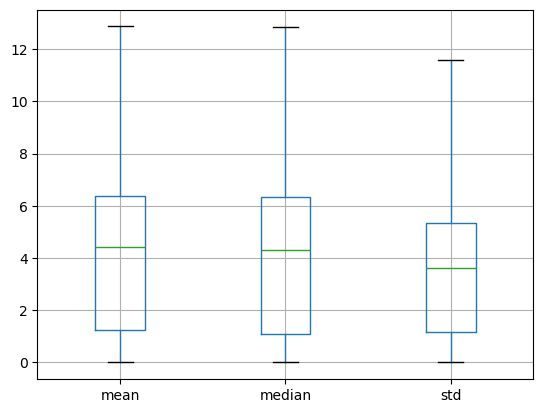

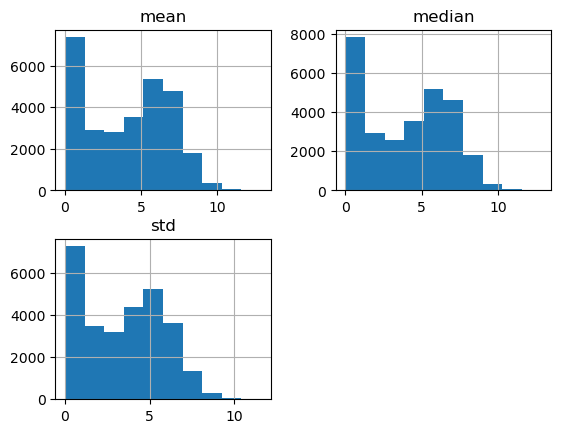

In [73]:
metrics_gene_noneuro = data.get_data_merged_noneuro().iloc[:,3:].mean(axis=0).to_frame(name="mean").join(
               data.get_data_merged_noneuro().iloc[:,3:].median(axis=0).to_frame(name="median").join(
               data.get_data_merged_noneuro().iloc[:,3:].std(axis=0).to_frame(name="std")
                 )
               )
metrics_gene_noneuro
log_metrics_gene_noneuro = np.log1p(metrics_gene_noneuro)
log_metrics_gene_noneuro.boxplot()
log_metrics_gene_noneuro.hist()

In [74]:
metrics_gene_noneuro

,mean,median,std
A1BG,39.764706,34.0,24.605714
A1BG-AS1,122.705882,124.0,31.003558
A1CF,0.000000,0.0,0.000000
A2M,2609.941176,2560.0,975.340227
A2M-AS1,92.470588,88.0,32.950944
...,...,...,...
X8_LINE:CR1:LINE,482.411765,493.0,128.792983
X9_LINE:L1:LINE,108.235294,106.0,36.567625
Zaphod2:hAT-Tip100:DNA,432.647059,431.0,100.770743
Zaphod3:hAT-Tip100:DNA,1665.823529,1679.0,407.932016


##Step 3 : PCA

On veut représenter nos données sur une figure en 2D en réduisant la dimension. Au jour d'aujourd'hui, réussir à plotter en 2D nous permet de faire beaucoup de choses avec juste nos yeux donc c'est intéressant. Le deuxième intérêt est de réduire le nombre d'informations pour économiser et rendre cela utilisable sur les algos.

In [75]:
data.get_data_merged().iloc[:, 3:]

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
Sample_id,,,,,,,,,,,,,,,,,,,,,
GSM3533230,42,149,0,3327,101,78,4,0,67,0,...,986,2218,2096,1120,84,556,134,570,2045,2446
GSM3533231,25,107,2,1787,153,109,2,1,25,0,...,1216,2373,2001,1144,118,582,153,552,2057,2279
GSM3533232,20,95,0,1830,121,127,1,1,11,0,...,905,2018,1815,1011,84,571,126,479,1659,1778
GSM3533233,22,101,0,2131,142,143,5,1,36,0,...,935,2278,2032,1198,97,562,132,540,2032,2135
GSM3533234,22,102,0,1706,83,178,1,3,31,0,...,966,2295,1993,1152,96,582,124,539,1742,1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533401,23,113,0,2130,72,71,2,3,21,0,...,553,1243,1089,658,72,320,73,311,1102,1169
GSM3533402,134,300,0,6077,171,42,8,5,225,0,...,719,1988,1691,966,119,460,109,399,1619,1724
GSM3533403,64,290,0,4752,118,174,8,2,135,0,...,623,1466,1246,726,61,358,107,347,1284,1469


Il faut normaliser + centrer les données avant de les filer au PCA car on peut avoir des différences empiriques dues aux récoltes de données, c'est pour cela qu'on normalise les données.

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standard_merged = scaler.fit_transform(data.get_data_merged().iloc[:, 3:]) # my_data being your dataframe containing your genes in column and samples in row
standard_merged

array([[ 0.19251575,  0.63398434, -0.25789342, ...,  1.2625332 ,
         1.06112223,  1.45131029],
       [-0.63866337, -0.24099928,  2.76805603, ...,  1.11502969,
         1.08714238,  1.1101587 ],
       [-0.88312782, -0.4909946 , -0.25789342, ...,  0.51682101,
         0.22414049,  0.08670394],
       ...,
       [ 1.26815933,  3.57142936, -0.25789342, ..., -0.5648714 ,
        -0.58898943, -0.54452863],
       [ 4.20173273,  4.44641298, -0.25789342, ...,  0.71349236,
         0.19595199,  0.2113162 ],
       [ 1.85487401,  1.55063385, -0.25789342, ...,  0.09069976,
         0.13740664,  0.0315477 ]])

In [77]:
from sklearn.decomposition import PCA
pca = PCA()
pca_merged = pca.fit_transform(standard_merged)
len(pca.explained_variance_ratio_)

176

labels :  176
per_var :  176


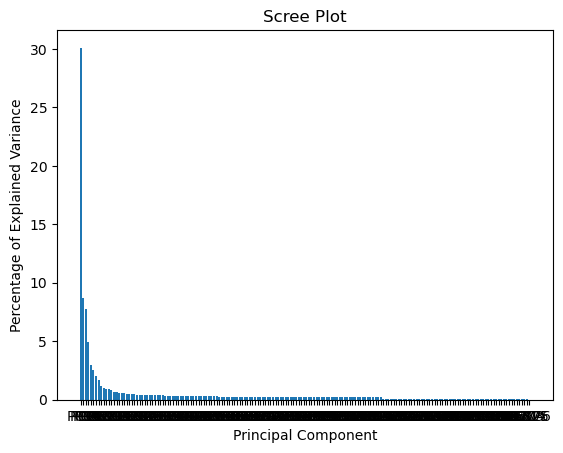

In [78]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC'+ str(x) for x in range(1,len(per_var)+1)]
print("labels : ", len(labels))
print("per_var : ", len(per_var))
plt.bar(x = range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()



In [79]:
pca_df = pd.DataFrame(pca_merged, columns=labels)

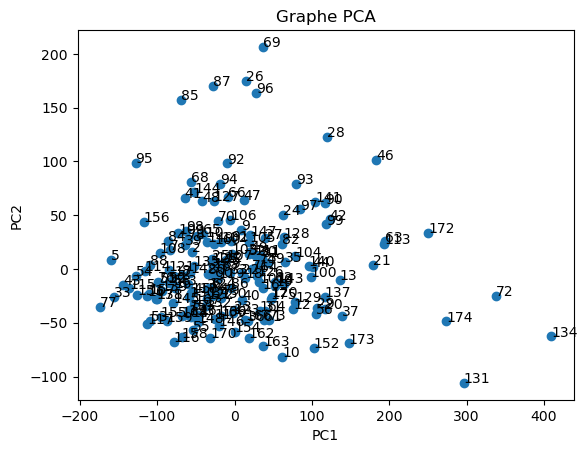

In [80]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('Graphe PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample] ))
plt.show()

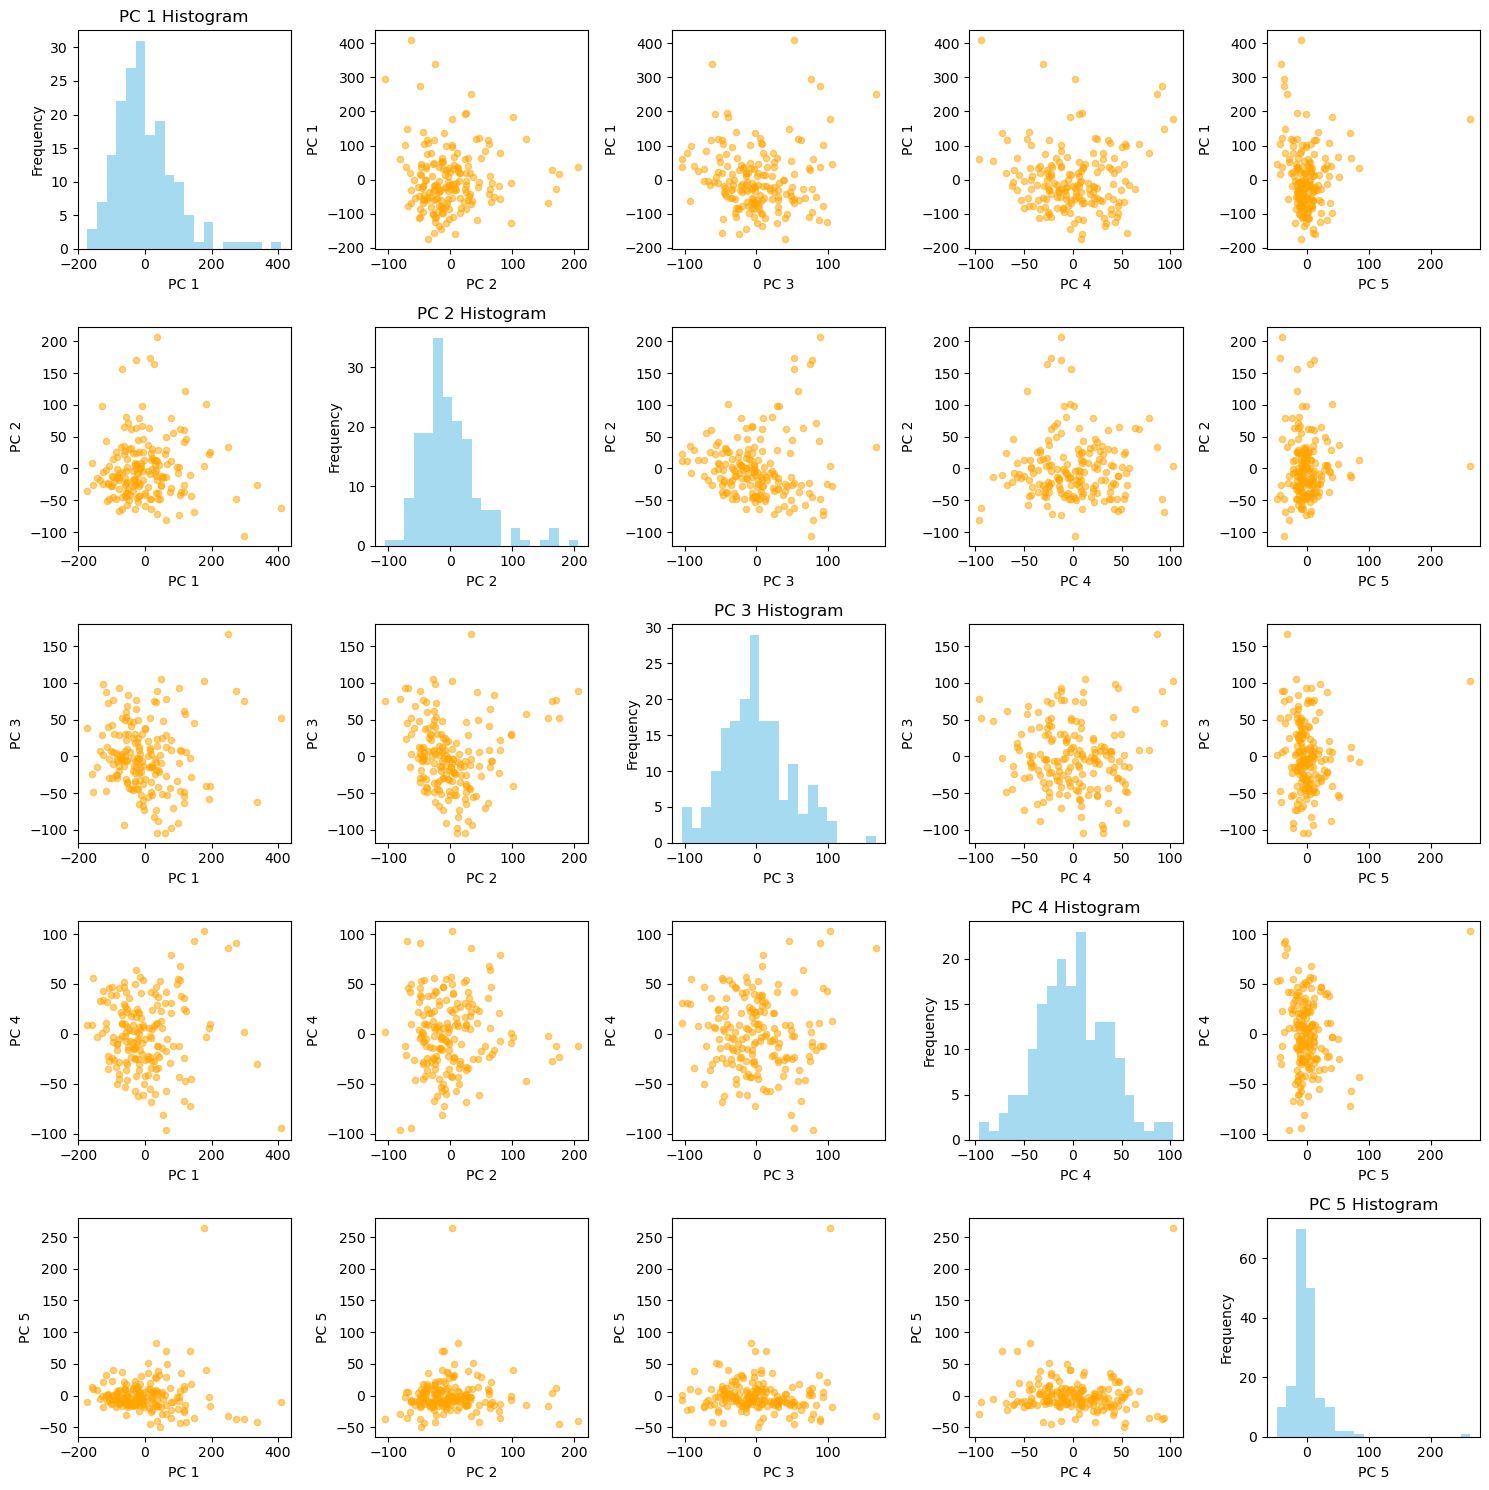

In [81]:
n_components = 5
pca_2 = PCA(n_components = n_components)
pca_data_2 = pca_2.fit_transform(standard_merged)

fig, axes = plt.subplots(n_components, n_components, figsize = (15, 15))

for i in range(n_components):
    for j in range(n_components):
        if( i==j):
            axes[i,j].hist(pca_data_2[:, i], bins = 20, color = 'skyblue', alpha = 0.75)
            axes[i,j].set_title(f'PC {i+1} Histogram')
            axes[i,j].set_xlabel(f'PC {i+1}')
            axes[i,j].set_ylabel('Frequency')
        else:
            axes[i,j].scatter(pca_data_2[:, j], pca_data_2[:, i], s = 20, color = 'orange', alpha = 0.5)
            axes[i,j].set_xlabel(f'PC {j+1}')
            axes[i,j].set_ylabel(f'PC {i+1}')
plt.tight_layout()
plt.show()
            

##Step 5 : Univariate Analysis

Estimer la différence entre deux groupes malades/non-malades, on peut faire ça en calculant une grandeur pour chaque gène.
Pour choisir le nombre de gènes, on va calculer une p-value.

On enlève les données avec des gènes peut exprimer.

In [12]:
data.get_data_merged()

,Source,Subject id,Sample_group,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
Sample_id,,,,,,,,,,,,,,,,,,,,,
GSM3533230,Frontal Cortex,NEUEL133AK6,ALS Spectrum MND,42,149,0,3327,101,78,4,...,986,2218,2096,1120,84,556,134,570,2045,2446
GSM3533231,Frontal Cortex,NEUYV496XLP,ALS Spectrum MND,25,107,2,1787,153,109,2,...,1216,2373,2001,1144,118,582,153,552,2057,2279
GSM3533232,Frontal Cortex,NEUZU200WEQ,ALS Spectrum MND,20,95,0,1830,121,127,1,...,905,2018,1815,1011,84,571,126,479,1659,1778
GSM3533233,Frontal Cortex,NEUME287RK2,ALS Spectrum MND,22,101,0,2131,142,143,5,...,935,2278,2032,1198,97,562,132,540,2032,2135
GSM3533234,Frontal Cortex,NEUEC006FND,ALS Spectrum MND,22,102,0,1706,83,178,1,...,966,2295,1993,1152,96,582,124,539,1742,1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533401,Frontal Cortex,NEUMY028JH4,ALS Spectrum MND,23,113,0,2130,72,71,2,...,553,1243,1089,658,72,320,73,311,1102,1169
GSM3533402,Frontal Cortex,NEUXR145UBL,ALS Spectrum MND,134,300,0,6077,171,42,8,...,719,1988,1691,966,119,460,109,399,1619,1724
GSM3533403,Frontal Cortex,NEUKN209FNW,ALS Spectrum MND,64,290,0,4752,118,174,8,...,623,1466,1246,726,61,358,107,347,1284,1469


In [10]:
data.get_data_merged()[["Source", "Subject id", "Sample_group"]]

,Source,Subject id,Sample_group
Sample_id,,,
GSM3533230,Frontal Cortex,NEUEL133AK6,ALS Spectrum MND
GSM3533231,Frontal Cortex,NEUYV496XLP,ALS Spectrum MND
GSM3533232,Frontal Cortex,NEUZU200WEQ,ALS Spectrum MND
GSM3533233,Frontal Cortex,NEUME287RK2,ALS Spectrum MND
GSM3533234,Frontal Cortex,NEUEC006FND,ALS Spectrum MND
...,...,...,...
GSM3533401,Frontal Cortex,NEUMY028JH4,ALS Spectrum MND
GSM3533402,Frontal Cortex,NEUXR145UBL,ALS Spectrum MND
GSM3533403,Frontal Cortex,NEUKN209FNW,ALS Spectrum MND


In [11]:
keep_genes = data.get_data_merged()[data.get_data_merged().iloc[:,3:].columns[data.get_data_merged().iloc[:,3:].sum(axis=0) >= 10]]
keep_genes = keep_genes.dropna()
keep_genes

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
Sample_id,,,,,,,,,,,,,,,,,,,,,
GSM3533230,42,149,0,3327,101,78,4,0,67,0,...,986,2218,2096,1120,84,556,134,570,2045,2446
GSM3533231,25,107,2,1787,153,109,2,1,25,0,...,1216,2373,2001,1144,118,582,153,552,2057,2279
GSM3533232,20,95,0,1830,121,127,1,1,11,0,...,905,2018,1815,1011,84,571,126,479,1659,1778
GSM3533233,22,101,0,2131,142,143,5,1,36,0,...,935,2278,2032,1198,97,562,132,540,2032,2135
GSM3533234,22,102,0,1706,83,178,1,3,31,0,...,966,2295,1993,1152,96,582,124,539,1742,1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533401,23,113,0,2130,72,71,2,3,21,0,...,553,1243,1089,658,72,320,73,311,1102,1169
GSM3533402,134,300,0,6077,171,42,8,5,225,0,...,719,1988,1691,966,119,460,109,399,1619,1724
GSM3533403,64,290,0,4752,118,174,8,2,135,0,...,623,1466,1246,726,61,358,107,347,1284,1469


In [17]:
keep_genes_merged = pd.merge(data.get_data_merged()[["Source", "Subject id", "Sample_group"]],
         keep_genes, 
         right_index=True, 
         left_on="Sample_id")
keep_genes_merged

,Source,Subject id,Sample_group,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
Sample_id,,,,,,,,,,,,,,,,,,,,,
GSM3533230,Frontal Cortex,NEUEL133AK6,ALS Spectrum MND,42,149,0,3327,101,78,4,...,986,2218,2096,1120,84,556,134,570,2045,2446
GSM3533231,Frontal Cortex,NEUYV496XLP,ALS Spectrum MND,25,107,2,1787,153,109,2,...,1216,2373,2001,1144,118,582,153,552,2057,2279
GSM3533232,Frontal Cortex,NEUZU200WEQ,ALS Spectrum MND,20,95,0,1830,121,127,1,...,905,2018,1815,1011,84,571,126,479,1659,1778
GSM3533233,Frontal Cortex,NEUME287RK2,ALS Spectrum MND,22,101,0,2131,142,143,5,...,935,2278,2032,1198,97,562,132,540,2032,2135
GSM3533234,Frontal Cortex,NEUEC006FND,ALS Spectrum MND,22,102,0,1706,83,178,1,...,966,2295,1993,1152,96,582,124,539,1742,1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533401,Frontal Cortex,NEUMY028JH4,ALS Spectrum MND,23,113,0,2130,72,71,2,...,553,1243,1089,658,72,320,73,311,1102,1169
GSM3533402,Frontal Cortex,NEUXR145UBL,ALS Spectrum MND,134,300,0,6077,171,42,8,...,719,1988,1691,966,119,460,109,399,1619,1724
GSM3533403,Frontal Cortex,NEUKN209FNW,ALS Spectrum MND,64,290,0,4752,118,174,8,...,623,1466,1246,726,61,358,107,347,1284,1469


Comparaisons avec sans preprocess :

In [19]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference


In [23]:
dds_no_preprocess = DeseqDataSet(
    counts=data.get_data_merged().iloc[:,3:],
    metadata=data.get_data_merged().iloc[:,:3],
    design_factors="Sample_group",
    refit_cooks=True,
    inference=DefaultInference(n_cpus=1)
)

/var/folders/tr/h_65n8h914l3t_14_m2z067r0000gn/T/ipykernel_52468/3324191662.py:1: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds_no_preprocess = DeseqDataSet(


In [24]:
dds = DeseqDataSet(
    counts=keep_genes_merged.iloc[:,3:],
    metadata=keep_genes_merged.iloc[:,:3],
    design_factors="Sample_group",
    refit_cooks=True,
    inference=DefaultInference(n_cpus=1)
)

/var/folders/tr/h_65n8h914l3t_14_m2z067r0000gn/T/ipykernel_52468/669221706.py:1: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(


In [25]:
dds.deseq2()
dds

Fitting size factors...
... done in 0.47 seconds.

Fitting dispersions...
... done in 34.70 seconds.

Fitting dispersion trend curve...
... done in 1.14 seconds.

Fitting MAP dispersions...
... done in 45.07 seconds.

Fitting LFCs...
... done in 17.79 seconds.

Replacing 221 outlier genes.

Fitting dispersions...
... done in 0.59 seconds.

Fitting MAP dispersions...
... done in 0.50 seconds.

Fitting LFCs...
... done in 0.18 seconds.



AnnData object with n_obs × n_vars = 176 × 26138
    obs: 'Source', 'Subject id', 'Sample-group'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks'

In [26]:
dds_no_preprocess.deseq2()
dds_no_preprocess

Fitting size factors...
... done in 0.44 seconds.

Fitting dispersions...
... done in 35.24 seconds.

Fitting dispersion trend curve...
... done in 1.13 seconds.

Fitting MAP dispersions...
... done in 46.60 seconds.

Fitting LFCs...
... done in 19.91 seconds.

Replacing 221 outlier genes.

Fitting dispersions...
... done in 0.41 seconds.

Fitting MAP dispersions...
... done in 0.43 seconds.

Fitting LFCs...
... done in 0.35 seconds.



AnnData object with n_obs × n_vars = 176 × 28953
    obs: 'Source', 'Subject id', 'Sample-group'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks'

In [87]:
from pydeseq2.ds import DeseqStats
stat_res = DeseqStats(dds)
stat_res_no_preprocess = DeseqStats(dds_no_preprocess)
print(stat_res.summary())
print(stat_res_no_preprocess.summary())

Running Wald tests...
... done in 15.66 seconds.



Log2 fold change & Wald test p-value: Sample-group Non-Neurological Control       vs ALS Spectrum MND      
                           baseMean  log2FoldChange     lfcSE      stat  \
A1BG                      35.993902        0.018088  0.142845  0.126629   
A1BG-AS1                 113.742747        0.052983  0.099893  0.530394   
A1CF                       0.155759       -0.590130  1.711139 -0.344875   
A2M                     2345.384523        0.119103  0.159455  0.746940   
A2M-AS1                   99.268405       -0.186492  0.098239 -1.898348   
...                             ...             ...       ...       ...   
X8_LINE:CR1:LINE         458.855014        0.058600  0.103843  0.564318   
X9_LINE:L1:LINE          109.576015       -0.073882  0.111311 -0.663747   
Zaphod2:hAT-Tip100:DNA   411.010268        0.065308  0.105925  0.616552   
Zaphod3:hAT-Tip100:DNA  1539.491230        0.107348  0.107397  0.999542   
Zaphod:hAT-Tip100:DNA   1710.104347        0.084253  0.097365  0.86

Running Wald tests...
... done in 8.63 seconds.



Log2 fold change & Wald test p-value: Sample-group Non-Neurological Control       vs ALS Spectrum MND      
                           baseMean  log2FoldChange     lfcSE      stat  \
A1BG                      35.993902        0.018089  0.142838  0.126642   
A1BG-AS1                 113.742747        0.052983  0.099893  0.530397   
A1CF                       0.155759       -0.590130  1.708666 -0.345375   
A2M                     2345.384523        0.119104  0.159463  0.746904   
A2M-AS1                   99.268405       -0.186492  0.098238 -1.898372   
...                             ...             ...       ...       ...   
X8_LINE:CR1:LINE         458.855014        0.058600  0.103845  0.564304   
X9_LINE:L1:LINE          109.576015       -0.073882  0.111311 -0.663748   
Zaphod2:hAT-Tip100:DNA   411.010268        0.065308  0.105927  0.616537   
Zaphod3:hAT-Tip100:DNA  1539.491230        0.107348  0.107400  0.999510   
Zaphod:hAT-Tip100:DNA   1710.104347        0.084253  0.097368  0.86

In [88]:
stat_res.lfc_shrink()
stat_res_no_preprocess.lfc_shrink()


Fitting MAP LFCs...


... done in 59.29 seconds.

Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: Sample-group Non-Neurological Control       vs ALS Spectrum MND      
                           baseMean  log2FoldChange     lfcSE      stat  \
A1BG                      35.993902        0.006795  0.086580  0.126629   
A1BG-AS1                 113.742747        0.030291  0.075337  0.530394   
A1CF                       0.155759       -0.006315  0.109603 -0.344875   
A2M                     2345.384523        0.045238  0.097031  0.746940   
A2M-AS1                   99.268405       -0.124386  0.094533 -1.898348   
...                             ...             ...       ...       ...   
X8_LINE:CR1:LINE         458.855014        0.028481  0.076612  0.564318   
X9_LINE:L1:LINE          109.576015       -0.034498  0.081144 -0.663747   
Zaphod2:hAT-Tip100:DNA   411.010268        0.032019  0.077917  0.616552   
Zaphod3:hAT-Tip100:DNA  1539.491230        0.077631  0.088373  0.999542   
Zaphod:hAT-Tip100:DNA   1710.104347        0.042460  0.07557

... done in 59.70 seconds.



p-value/padj nous permet d'observer des différences surprenantes de la répartition des gènes entre les malades et non malades, si la padj est en dessous de 5% alors la proba qu'on est obtenue ces différences de résultats est faible.
Le foldchange permet de savoir de combien est la différence.

On voit ici que les gènes avec un padj <= 0.05 sont du nombre de 2276. 
En faisant un log10, les valeurs petites deviennent négatives et de plus en plus petites. 

In [89]:
stat_res.results_df[stat_res.results_df['padj'] <= 0.05]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
A3GALT2,2.591343,1.083328,0.312867,4.265521,0.000020,0.003205
AANAT,2.773223,0.498922,0.335300,2.896970,0.003768,0.044031
ABCB8,452.508149,0.320825,0.117227,3.407954,0.000655,0.018266
ABCC1,446.619429,0.191712,0.077043,2.997512,0.002722,0.036936
ABCC10,260.105293,0.318223,0.148851,3.020611,0.002523,0.035276
...,...,...,...,...,...,...
MSR1:Satellite:Satellite,217.254453,0.555696,0.155038,4.223069,0.000024,0.003390
PRIMA41-int:ERV1:LTR,581.463863,0.258259,0.118827,2.895385,0.003787,0.044147
REP522:telo:Satellite,155.382458,0.388484,0.202907,2.891259,0.003837,0.044196
Ricksha_a:MuDR:DNA,45.348024,0.370677,0.137963,3.459060,0.000542,0.016733


In [90]:
np.log10(stat_res.results_df[stat_res.results_df['padj'] <= 0.05])


/usr/local/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log10
  result = func(self.values, **kwargs)


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
A3GALT2,0.413525,0.034760,-0.504641,0.629972,-4.700197,-2.494147
AANAT,0.442985,-0.301968,-0.474566,0.461944,-2.423906,-1.356244
ABCB8,2.655626,-0.493731,-0.930971,0.532494,-3.184078,-1.738362
ABCC1,2.649938,-0.717351,-1.113264,0.476761,-2.565123,-1.432553
ABCC10,2.415149,-0.497269,-0.827249,0.480095,-2.598143,-1.452519
...,...,...,...,...,...,...
MSR1:Satellite:Satellite,2.336969,-0.255163,-0.809562,0.625628,-4.617987,-2.469744
PRIMA41-int:ERV1:LTR,2.764523,-0.587944,-0.925084,0.461706,-2.421711,-1.355101
REP522:telo:Satellite,2.191402,-0.410626,-0.692702,0.461087,-2.416006,-1.354614
Ricksha_a:MuDR:DNA,1.656558,-0.431005,-0.860237,0.538958,-3.265949,-1.776439


Sur les données sans preprocess, on a deux gènes de plus.

In [91]:
stat_res_no_preprocess.results_df[stat_res_no_preprocess.results_df['padj'] <= 0.05]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
A3GALT2,2.591343,1.083435,0.312692,4.267515,0.000020,0.003166
AANAT,2.773223,0.499283,0.334871,2.898488,0.003750,0.043732
ABCB8,452.508149,0.320882,0.117232,3.407862,0.000655,0.018211
ABCC1,446.619429,0.191710,0.077044,2.997484,0.002722,0.036736
ABCC10,260.105293,0.318226,0.148857,3.020520,0.002523,0.035168
...,...,...,...,...,...,...
MSR1:Satellite:Satellite,217.254453,0.555689,0.155043,4.222942,0.000024,0.003380
PRIMA41-int:ERV1:LTR,581.463863,0.258091,0.118825,2.895299,0.003788,0.044010
REP522:telo:Satellite,155.382458,0.388471,0.202917,2.891167,0.003838,0.044082
Ricksha_a:MuDR:DNA,45.348024,0.370683,0.137957,3.459196,0.000542,0.016625


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


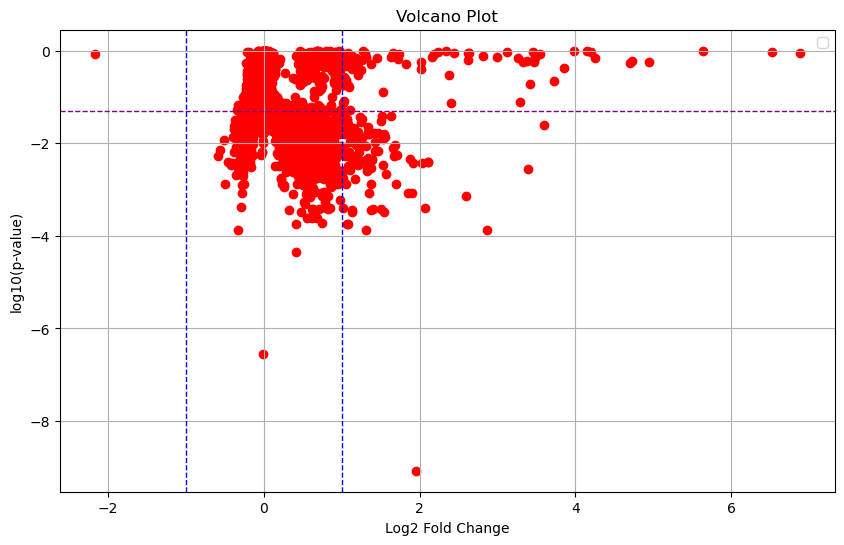

In [81]:
p_value_threshold = 0.05
fold_change_threshold = 1.0

plt.figure(figsize=(10, 6))
plt.scatter(stat_res.results_df['log2FoldChange'], np.log10(stat_res.results_df['padj']), color='red')

# Ajouter des lignes pour les seuils de p-value et de fold change
plt.axhline(np.log10(p_value_threshold), color='purple', linestyle='--', linewidth=1)
plt.axvline(fold_change_threshold, color='blue', linestyle='--', linewidth=1)
plt.axvline(-fold_change_threshold, color='blue', linestyle='--', linewidth=1)

# Étiqueter les axes
plt.xlabel('Log2 Fold Change')
plt.ylabel('log10(padj)')
plt.title('Volcano Plot')
plt.legend()

# Afficher le plot
plt.grid(True)
plt.show()


Donc pour résumer, ce qu'on cherche ce sont les gènes qui ont une différence d'expression selon si on est malade ou non.
La p-value <=0.05 nous permet de nous dire que la probabilité que ce n'est pas le cas est faible.
Le log2 fold change nous permet de dire à quel point la différence d'expression entre les malades et non malade est grande en log2.

Donc les points représentant les gènes sur la figure ci-dessus qui nous intéressent sont ceux en bas à droite et ceux en bas à gauche.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


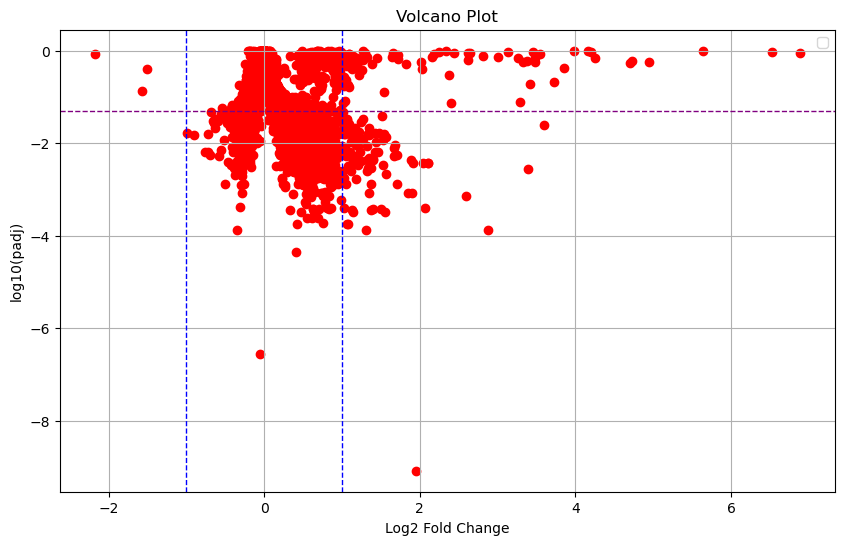

In [82]:
plt.figure(figsize=(10, 6))
plt.scatter(stat_res_no_preprocess.results_df['log2FoldChange'], np.log10(stat_res_no_preprocess.results_df['padj']), color='red')

# Ajouter des lignes pour les seuils de p-value et de fold change
plt.axhline(np.log10(p_value_threshold), color='purple', linestyle='--', linewidth=1)
plt.axvline(fold_change_threshold, color='blue', linestyle='--', linewidth=1)
plt.axvline(-fold_change_threshold, color='blue', linestyle='--', linewidth=1)

# Étiqueter les axes
plt.xlabel('Log2 Fold Change')
plt.ylabel('log10(padj)')
plt.title('Volcano Plot')
plt.legend()

# Afficher le plot
plt.grid(True)
plt.show()

In [85]:
volcano_genes = stat_res.results_df[['log2FoldChange', 'padj']]
volcano_genes = volcano_genes[(volcano_genes['log2FoldChange'] > fold_change_threshold) 
                              & (np.log10(volcano_genes['padj'])<np.log10(p_value_threshold))]
volcano_genes

,log2FoldChange,padj
A3GALT2,1.080137,3.205184e-03
ABO,1.131532,3.579424e-04
ALDH1L1-AS1,1.044898,1.916195e-02
ALLC,1.168297,1.084382e-02
ANKRD20A9P,1.948869,8.462768e-10
...,...,...
L1PA2:L1:LINE,1.030617,3.402744e-02
L1PA3:L1:LINE,1.065728,3.351048e-02
L1PA4:L1:LINE,1.024670,3.051480e-02
L1PA5:L1:LINE,1.065208,3.175792e-02


In [86]:
volcano_genes_no_preprocess = stat_res_no_preprocess.results_df[['log2FoldChange', 'padj']]
volcano_genes_no_preprocess = volcano_genes_no_preprocess[(volcano_genes_no_preprocess['log2FoldChange'] > fold_change_threshold) 
                                                          & (np.log10(volcano_genes_no_preprocess['padj'])<np.log10(p_value_threshold))]
volcano_genes_no_preprocess

,log2FoldChange,padj
A3GALT2,1.083435,3.166159e-03
ABO,1.133180,3.541432e-04
ALDH1L1-AS1,1.053273,1.902949e-02
ALLC,1.172595,1.076340e-02
ANKRD20A9P,1.949225,8.384242e-10
...,...,...
L1PA2:L1:LINE,1.031038,3.389795e-02
L1PA3:L1:LINE,1.065990,3.338631e-02
L1PA4:L1:LINE,1.024972,3.038290e-02
L1PA5:L1:LINE,1.065474,3.162754e-02


On obtient une centaine de gènes qui seraient susceptible d'avoir une expression différentes entre les controls et les malades d'ALS avec une différence d'au moins 1 de log2foldchange.